# Dataset choice

1. Select (create) a dataset1,2, 3 to perform this and other laboratory works. Your choice must be approved by the tutor.

## Requirements
Data set requirements:
- Numeric (integer and real) and categorical values must exist.
- For a dataset, the number of records (rows) m must be at least 500, i.e., ∞> m ≥ 500 and the number of attributes n must be at least 8 (columns) ∞> n ≥ 8. If there are fewer attributes in the selected dataset, you have to add derivatives (created)

## About dataset

The dataset chosen is a set of customers information in IT. The aim of this dataset is to predict customer churn.

Link : [IT Customers Churn (Kaggle.com)](https://www.kaggle.com/datasets/soheiltehranipour/it-customer-churn)


## Attributes

The dataset has 3 different groups of information :
- Services that customer has signed up for
- Customer account information
- Customer demographic information

It also has a column saying if the customer has left the company within the last month.

| Attribute | Type | Description |
| --------- | ---- | ----------- |
| gender | Category | Gender of the customer (male or female) |
| SeniorCitizen | Category | Senior citizen or not (1 or 0) |
| Partner | Category | Customer has a partner or not (Yes or No) |
| Dependents| Category | Customer has dependents or not (Yes or No) |
| tenure | Number (int) | Average time since customer has initiated contracts (in years) |
| PhoneService | Category | Customer has a phone service or not (Yes or No) |
| MultipleLines | Category | Customer has multiples lines |
| InternetService | Category | Type of customer's Internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Category | Customer has online security |
| OnlineBackup | Category | Customer has online backup |
| DeviceProtection | Category | Customer has device protection |
| TechSupport | Category | Customer has tech support |
| StreamingTV | Category | Customer subscribed to Streaming TV |
| StreamingMovies | Category | Customer subscrite to Streaming Movies |
| Contract | Category | Customer contract type (One year, Month-to-month, two year, ...) |
| PaperlessBilling | Category | Customer billing paperless or not (Yes or No) |
| PaymentMethod | Category | Customer payment method |
| MonthlyCharges | Number (float) | Customer monthly charges |
| TotalCharges | Number (float) | Customer total charges |
| Churn | Category | Customer left within the last month (Yes or No) |

# Dataset importation

## Import libraries
Let's import libraries :
- numpy for math 
- pandas for data manipulation and analysis
- matplotlib for plotting

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load dataset

Loading dataset using the pandas library [read_csv doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv).

In [2]:
# Load dataset
dataset = pd.read_csv("IT_customer_churn.csv")

# Check if the csv file has been well loaded by showing a sample of data
dataset.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3288,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.85,272.35,No
3283,Female,0,Yes,Yes,69,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.35,1442.65,No
2358,Female,0,Yes,No,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.70,1140.05,No
5080,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,93.15,6368.2,No
1755,Female,0,No,No,12,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.30,654.5,No


## Check datatypes

In [3]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Dataset quality analysis

### 2. For each countinuous (numeric) type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality,
- minimum (min) and maximum (max) values,
- 1st and 3rd quartiles,
- average,
- median,
- Standard deviation.

### 3. For each category type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality
- Mode. Mode is the most frequent sample value.
- The frequency value of the mode
- Percentage value of the mode
- Second mode value (2nd mode),
- Frequency value for 2nd mode,
- Percentage of 2nd mode.

Previously, a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) was created. Let's use its methods to find statistics we need.

In [26]:
# create empty lists to store the results
results_categories = []
results_numericals = []

for column in dataset.columns:
    # check if the column is a category
    if dataset[column].dtype == 'object':
        result = {}
        result['Attribute'] = column
        result['Total Value'] = dataset[column].count()
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        
        value_counts = dataset[column].value_counts()
        result['Mode'] = value_counts.index[0]
        result['Frequency of Mode'] = value_counts.iloc[0]
        result['Percentage of Mode'] = (value_counts.iloc[0] / dataset[column].count()) * 100
        # Check if 2nd Mode exists
        if value_counts.shape[0] > 1:
            result['2nd Mode'] = value_counts.index[1]
            result['Frequency of 2nd Mode'] = value_counts.iloc[1]
            result['Percentage of 2nd Mode'] = (value_counts.iloc[1] / dataset[column].count()) * 100
            
        results_categories.append(result)

    # check if the column is numeric
    else:
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        result['Min'] = dataset[column].min()
        result['Max'] = dataset[column].max()
        result['1st Quartile'] = dataset[column].quantile(0.25)
        result['3rd Quartile'] = dataset[column].quantile(0.75)
        result['Average'] = dataset[column].mean()
        result['Median'] = dataset[column].median()
        result['Standard Deviation'] = dataset[column].std()
        results_numericals.append(result)

## Display dataframe

In [27]:
# Create dataframes from results lists
results_categories_df = pd.DataFrame(results_categories)
results_numericals_df = pd.DataFrame(results_numericals)

# Display dataframes
print(results_numericals_df.to_markdown())
print(results_categories_df.to_markdown())

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |    Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|-------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | SeniorCitizen  |           7043 |                              0 |             2 |  0    |   1    |            0   |           0    |  0.162147 |     0    |             0.368612 |
|  1 | tenure         |           7043 |                              0 |            73 |  0    |  72    |            9   |          55    | 32.3711   |    29    |            24.5595   |
|  2 | MonthlyCharges |           7043 |                              0 |          1585 | 18.25 | 118.75 |           35.5 |          89.85 | 64.7617   |    70.35 |            30.09     |
|    | Attribute        |   Total Value |   Total Values |   Perc

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |    Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|-------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | SeniorCitizen  |           7043 |                              0 |             2 |  0    |   1    |            0   |           0    |  0.162147 |     0    |             0.368612 |
|  1 | tenure         |           7043 |                              0 |            73 |  0    |  72    |            9   |          55    | 32.3711   |    29    |            24.5595   |
|  2 | MonthlyCharges |           7043 |                              0 |          1585 | 18.25 | 118.75 |           35.5 |          89.85 | 64.7617   |    70.35 |            30.09     |


|    | Attribute        |   Total Value |   Total Values |   Percentage of Missing Values |   Cardinality | Mode             |   Frequency of Mode |   Percentage of Mode | 2nd Mode     |   Frequency of 2nd Mode |   Percentage of 2nd Mode |
|---:|:-----------------|--------------:|---------------:|-------------------------------:|--------------:|:-----------------|--------------------:|---------------------:|:-------------|------------------------:|-------------------------:|
|  0 | gender           |          7043 |           7043 |                              0 |             2 | Male             |                3555 |            50.4756   | Female       |                    3488 |                49.5244   |
|  1 | Partner          |          7043 |           7043 |                              0 |             2 | No               |                3641 |            51.6967   | Yes          |                    3402 |                48.3033   |
|  2 | Dependents       |          7043 |           7043 |                              0 |             2 | No               |                4933 |            70.0412   | Yes          |                    2110 |                29.9588   |
|  3 | PhoneService     |          7043 |           7043 |                              0 |             2 | Yes              |                6361 |            90.3166   | No           |                     682 |                 9.68337  |
|  4 | MultipleLines    |          7043 |           7043 |                              0 |             3 | No               |                3390 |            48.1329   | Yes          |                    2971 |                42.1837   |
|  5 | InternetService  |          7043 |           7043 |                              0 |             3 | Fiber optic      |                3096 |            43.9585   | DSL          |                    2421 |                34.3746   |
|  6 | OnlineSecurity   |          7043 |           7043 |                              0 |             3 | No               |                3498 |            49.6663   | Yes          |                    2019 |                28.6668   |
|  7 | OnlineBackup     |          7043 |           7043 |                              0 |             3 | No               |                3088 |            43.845    | Yes          |                    2429 |                34.4881   |
|  8 | DeviceProtection |          7043 |           7043 |                              0 |             3 | No               |                3095 |            43.9443   | Yes          |                    2422 |                34.3888   |
|  9 | TechSupport      |          7043 |           7043 |                              0 |             3 | No               |                3473 |            49.3114   | Yes          |                    2044 |                29.0217   |
| 10 | StreamingTV      |          7043 |           7043 |                              0 |             3 | No               |                2810 |            39.8978   | Yes          |                    2707 |                38.4353   |
| 11 | StreamingMovies  |          7043 |           7043 |                              0 |             3 | No               |                2785 |            39.5428   | Yes          |                    2732 |                38.7903   |
| 12 | Contract         |          7043 |           7043 |                              0 |             3 | Month-to-month   |                3875 |            55.0192   | Two year     |                    1695 |                24.0664   |
| 13 | PaperlessBilling |          7043 |           7043 |                              0 |             2 | Yes              |                4171 |            59.2219   | No           |                    2872 |                40.7781   |
| 14 | PaymentMethod    |          7043 |           7043 |                              0 |             4 | Electronic check |                2365 |            33.5794   | Mailed check |                    1612 |                22.888    |
| 15 | TotalCharges     |          7043 |           7043 |                              0 |          6531 |                  |                  11 |             0.156183 | 20.2         |                      11 |                 0.156183 |
| 16 | Churn            |          7043 |           7043 |                              0 |             2 | No               |                5174 |            73.463    | Yes          |                    1869 |                26.537    |

### 4. Draw histograms of attributes 
Recommended number of histogram columns is defined by a formula: $ 1 + 3.22 \times 𝑙𝑜𝑔_𝑒(𝑛) $, where n is sample size. Provide descriptions of the distribution (e.g., normal, exponential, etc.) and what conclusions can be drawn from i

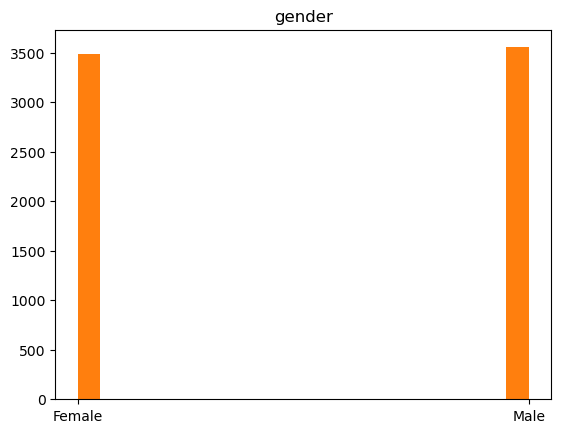

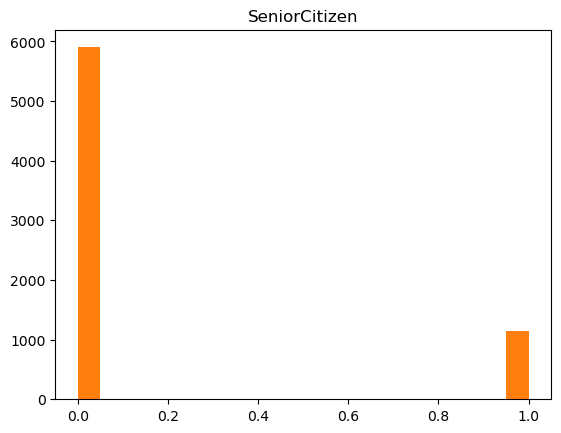

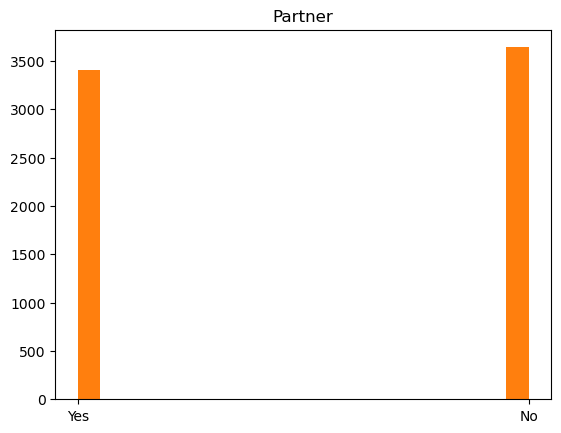

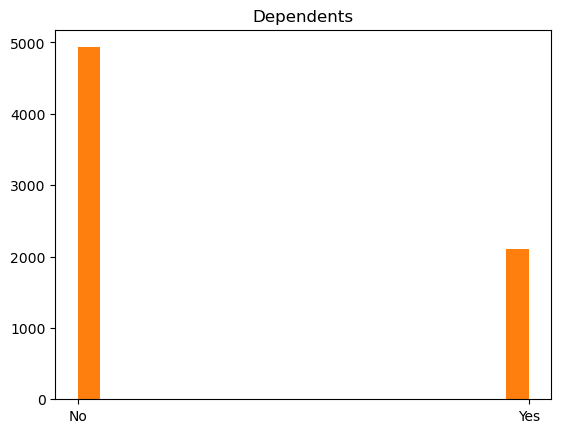

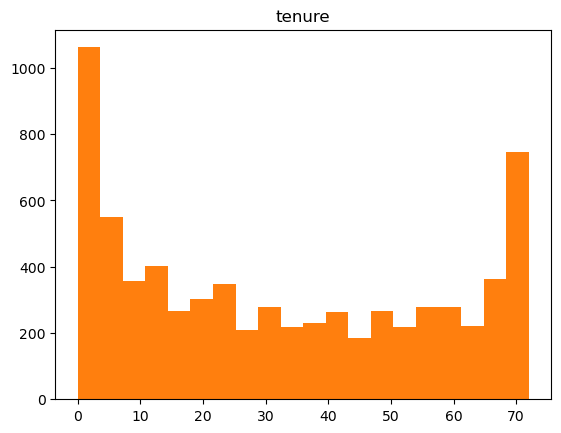

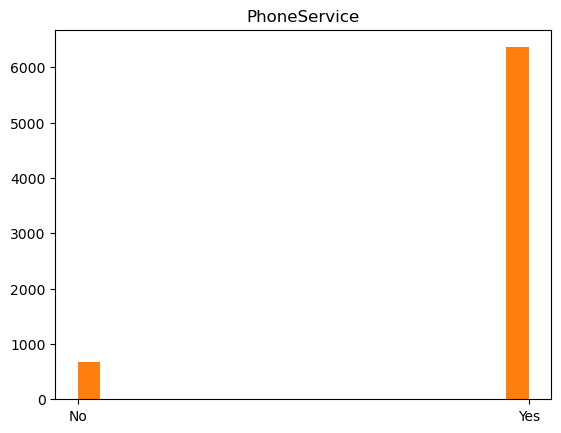

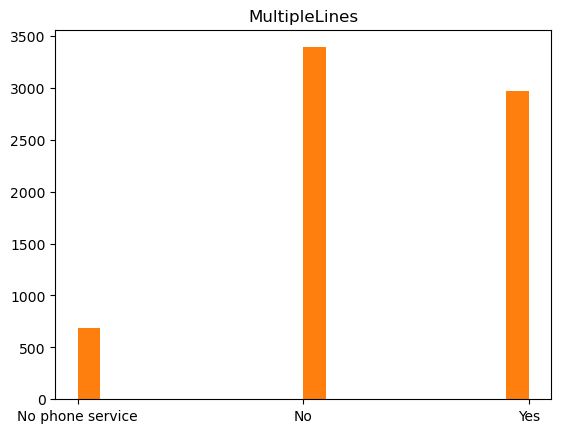

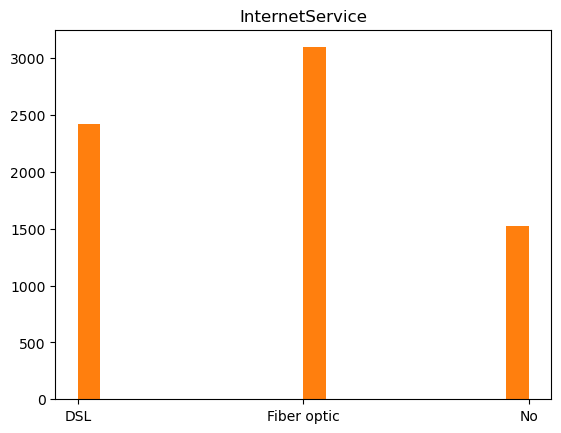

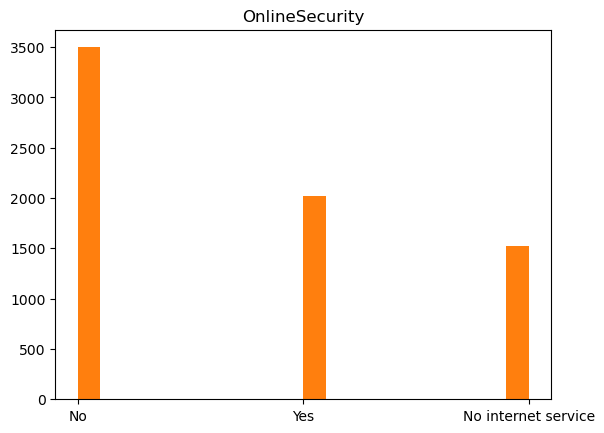

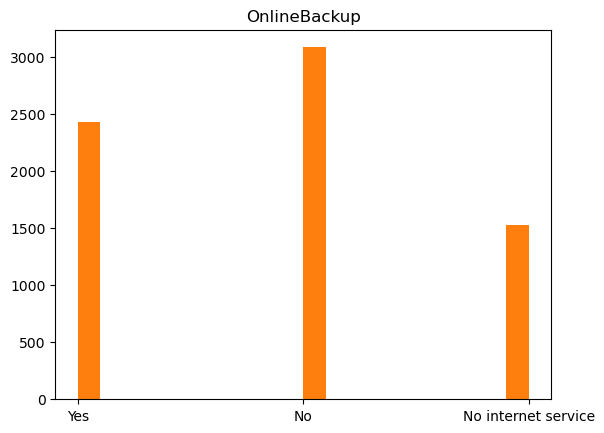

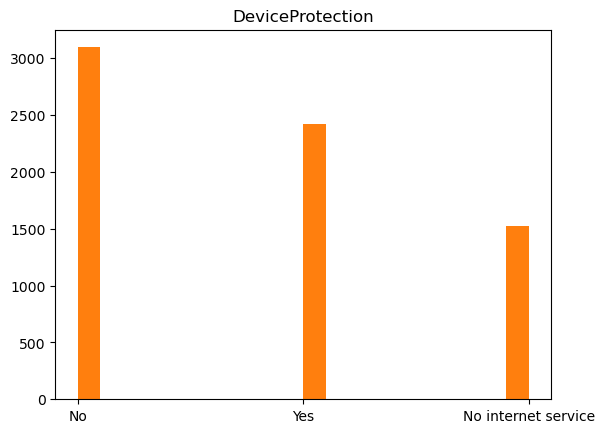

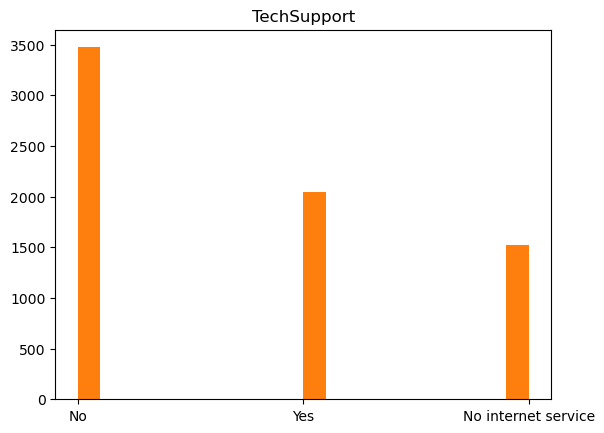

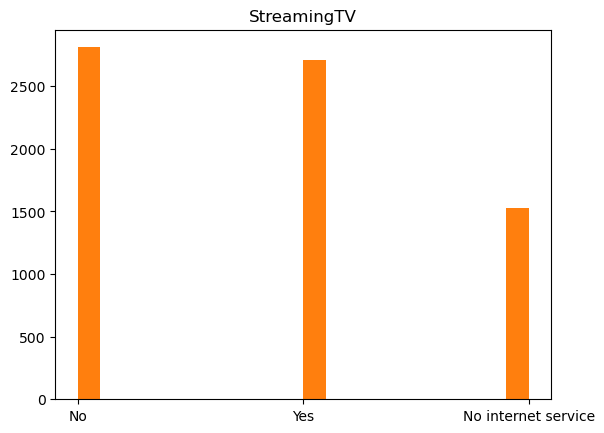

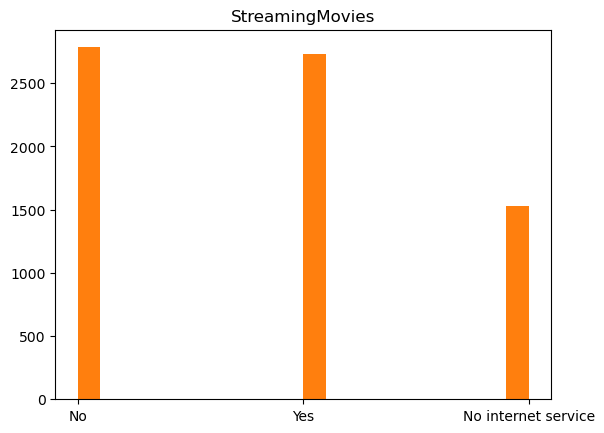

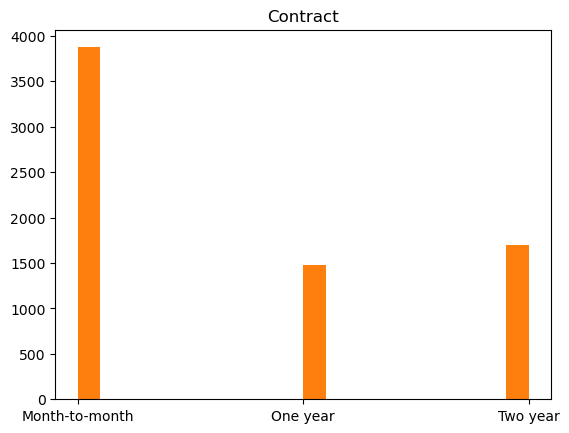

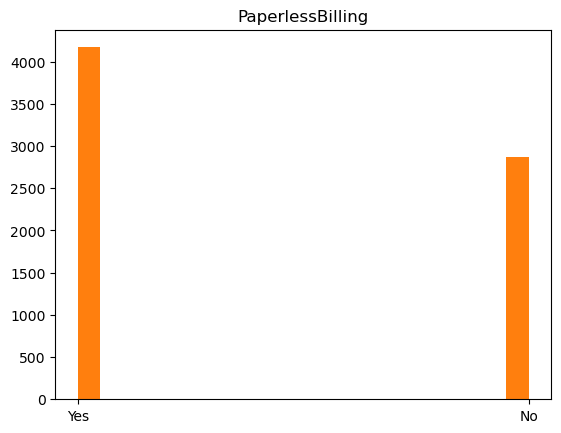

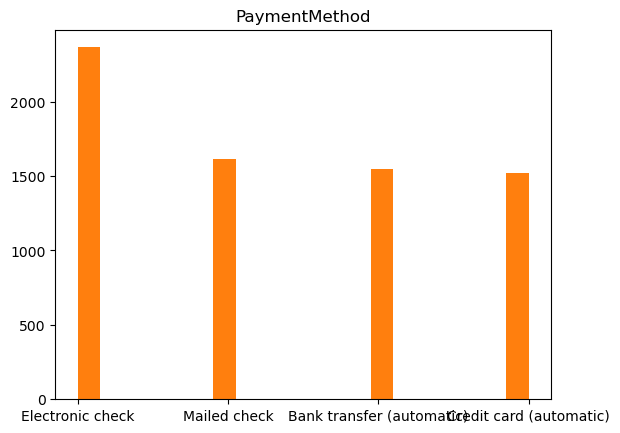

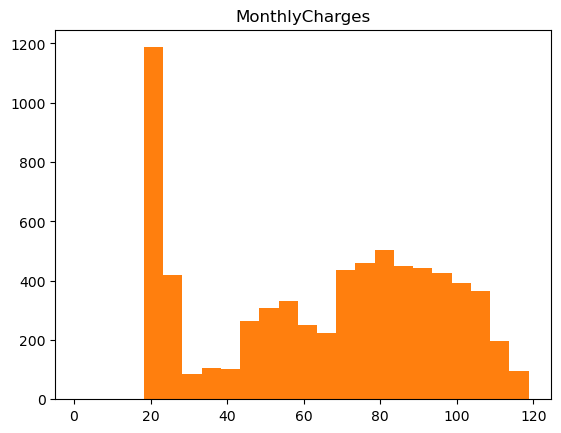

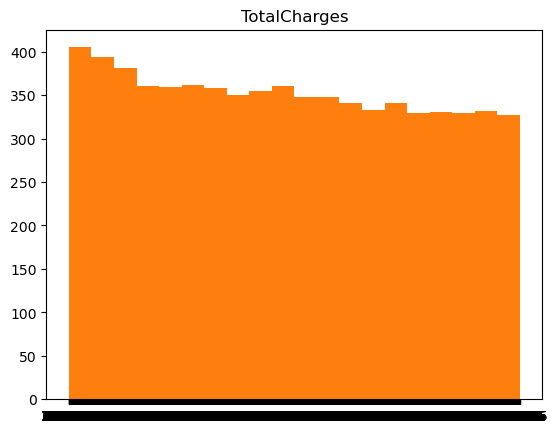

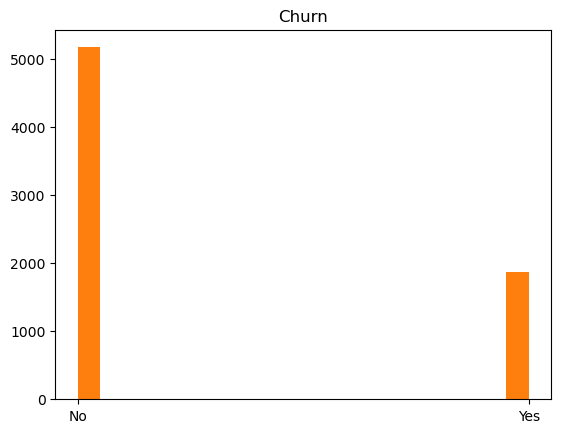

In [42]:
# calculate the recommended number of histogram columns
histogram_col_nb = int(1 + 3.22 * np.log(dataset.shape[0]))

# loop through each continuous column of the dataframe
# for i, column in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns):
#     # plot the histogram for the column
#     plt.plot(int(np.ceil(len(dataset.select_dtypes(include=['float64', 'int64']).columns) / histogram_col_nb)), histogram_col_nb, i + 1)
#     plt.hist(dataset[column].dropna(), bins=20)
#     plt.title(column)
#     plt.show()

for i, column in enumerate(dataset.columns):
    # plot the histogram for the column
    plt.plot(int(np.ceil(len(dataset.columns) / histogram_col_nb)), histogram_col_nb)
    plt.hist(dataset[column].dropna(), bins=20)
    plt.title(column)
    plt.show()